In [8]:
#%load_ext autoreload
#%autoreload 2

In [2]:
from jax.config import config
config.update("jax_enable_x64", True)

In [3]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import moscot
from moscot.problems.time import TemporalProblem
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [4]:
adata = sc.read_h5ad("/lustre/groups/ml01/workspace/moscot_paper/pancreas/pancreas_2022_gex_scvi.h5ad")

In [5]:
adata.obs['time'] = adata.obs.apply(lambda x: 14.5 if x["sample"]=="E14.5" else 15.5, axis=1)

In [9]:
endocrine_celltypes = [
    "Ductal",
    "Prlf. Ductal",
    "Ngn3 low",
    "Ngn3 high",
    "Ngn3 high cycling",
    "Fev+",
    "Fev+ Alpha",
    "Fev+ Beta",
    "Fev+ Delta",
    "Eps/Delta progenitors",
    "Alpha",
    "Beta",
    "Delta",
    "Epsilon"
]

In [10]:
adata_red = adata[adata.obs["celltype"].isin(endocrine_celltypes)]

In [11]:
adata = adata_red.copy()

In [12]:
adata

AnnData object with n_obs × n_vars = 13668 × 2000
    obs: 'n_counts', 'sample', 'int_id', 'reporter', 'log_cell_probs', 'cell_barcodes_du', 'cell_barcodes_cr', 'cell_barcodes', 'log_counts', 'n_genes', 'log_genes', 'mt_frac', 'rp_frac', 'ambi_frac', 'total_counts_rank', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'log_nCount_ATAC', 'log_nFeature_ATAC', 'scrublet_scores', 'scrublet_doublets', 'scrublet_doublets_cat', 'dd_doublets', 'dd_scores', 'dd_log_p_values', 'dd_voting_average', 'dd_-log_p_values', 'dd_doublets_cat', 'pANN', 'DF_classifications_1', 'DF_classifications_2', 'pANN_SCT', 'DF_SCT_classifications_1', 'DF_SCT_classifications_2', 'df_doublets', 

# PCA of GEX space

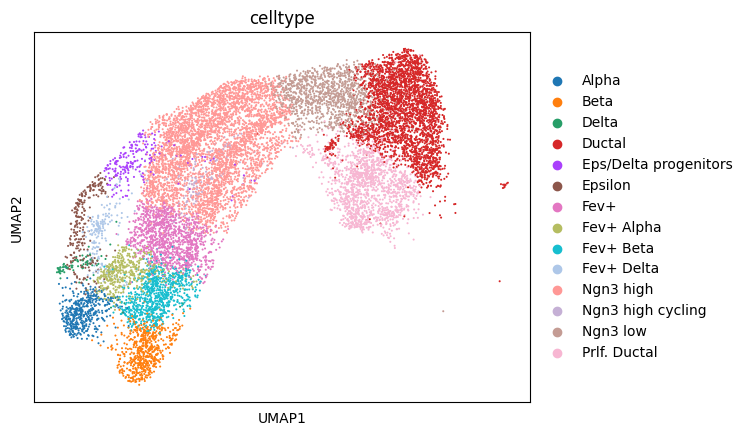

In [13]:
sc.pl.umap(adata, color="celltype")

In [14]:
tp0 = TemporalProblem(adata)
tp0 = tp0.prepare("time")

In [15]:
tp0 = tp0.solve(epsilon=1e-2, scale_cost="mean", max_iterations=1e4)

In [16]:
tp0[14.5, 15.5].solution.converged

True

In [18]:
tp0.pull(14.5, 15.5, data="celltype", subset="Delta")

In [20]:
adata.obs["pull"].sum()

1.9999999946522025

In [21]:
import moscot.plotting as mpl

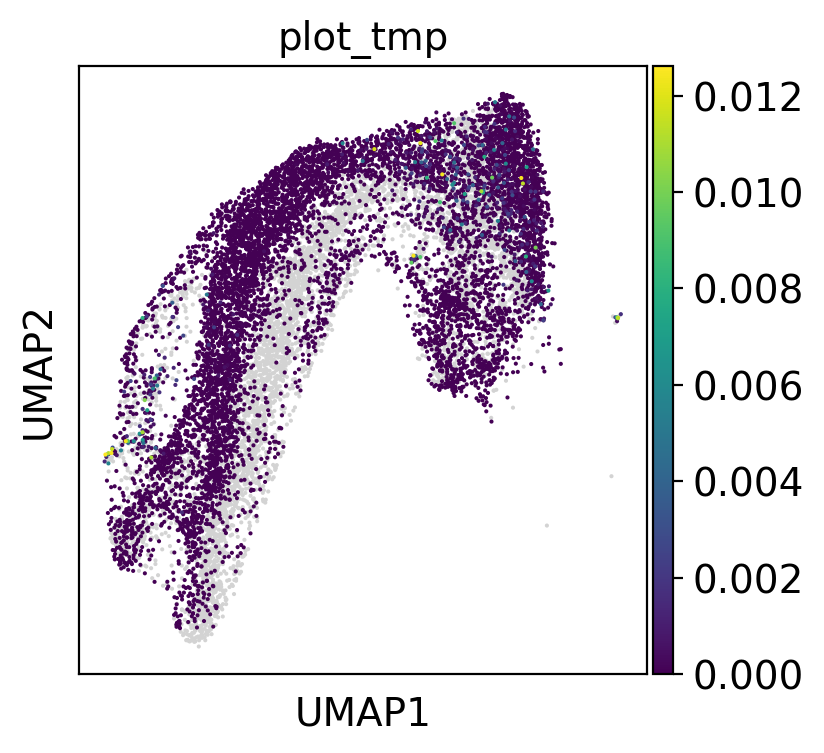

In [29]:
mpl.pull(tp0, time_points=[14.5])

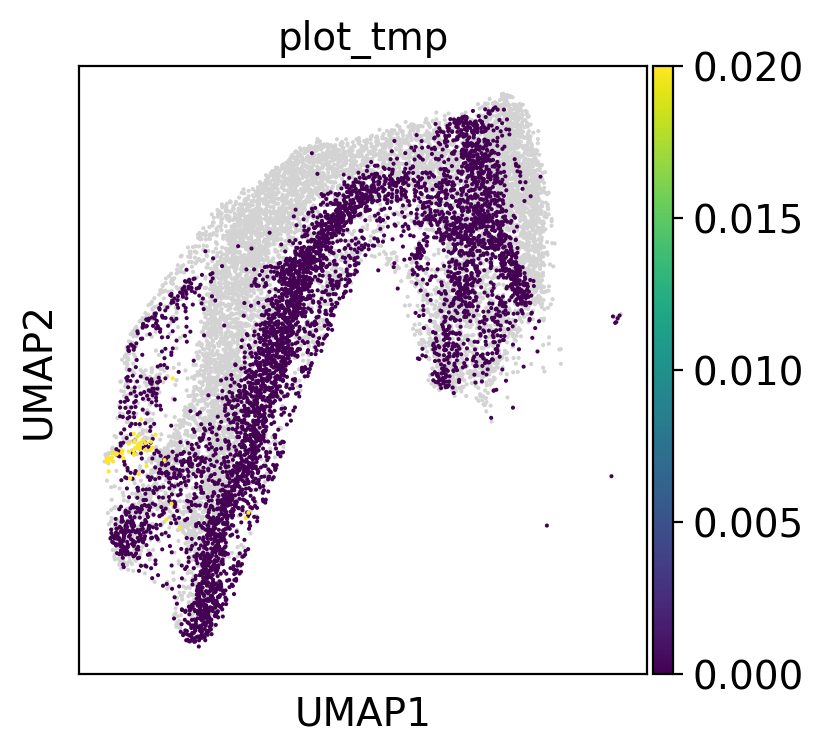

In [30]:
mpl.pull(tp0, time_points=[15.5])

In [31]:
adata.obs.to_csv("/lustre/groups/ml01/workspace/moscot_paper/pancreas/delta_pull_gex.csv")